In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from model import train_keras_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Import data and train model

In [3]:
from mnist import MNIST

mnist = MNIST('MNIST')

x_train, y_train = mnist.load_training() # 60000 samples
x_test, y_test = mnist.load_testing() # 10000 samples

In [4]:
from sklearn.preprocessing import LabelBinarizer


x_train = np.asarray(x_train).astype(np.float32)
y_train_int = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test_int = np.asarray(y_test).astype(np.int32)

"""
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train_int)
y_test = lb.fit_transform(y_test_int)
"""

In [5]:
x_train.reshape(len(x_train), 28, 28, 1).shape

(60000, 28, 28, 1)

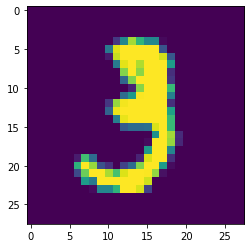

In [6]:
plt.imshow(x_train[10].reshape(28, 28))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1, metric='euclidean')
knn.fit(x_train, y_train_int)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

### Evaluate model

In [19]:
classes = knn.predict(x_test[:500])

In [10]:
#lb.inverse_transform(classes)
classes

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

In [11]:
y_test_int[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

In [20]:
bins = [1 if i == j else 0 for i, j in zip(classes, y_test_int[:1000])]
hitrate = sum(bins)/len(bins)

print(hitrate)

0.956


Actual number: 4 
Predicted number: 0


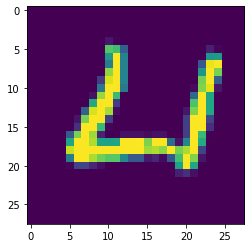

Actual number: 2 
Predicted number: 1


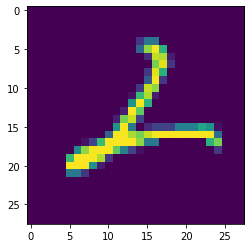

Actual number: 8 
Predicted number: 2


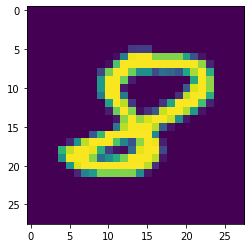

Actual number: 2 
Predicted number: 7


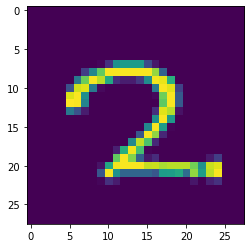

Actual number: 4 
Predicted number: 9


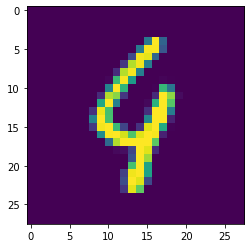

Actual number: 3 
Predicted number: 1


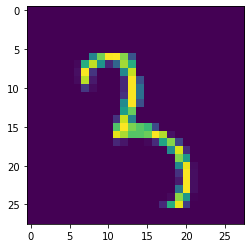

Actual number: 9 
Predicted number: 8


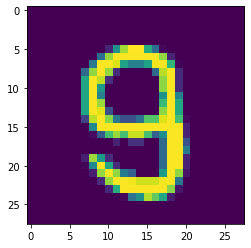

Actual number: 4 
Predicted number: 6


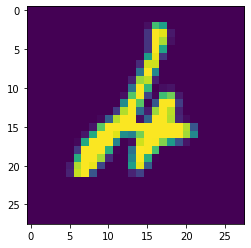

Actual number: 4 
Predicted number: 1


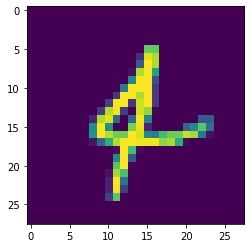

Actual number: 2 
Predicted number: 0


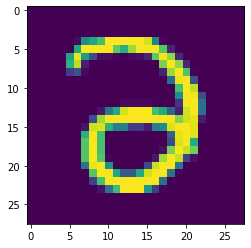

Actual number: 9 
Predicted number: 7


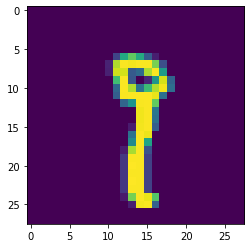

Actual number: 2 
Predicted number: 7


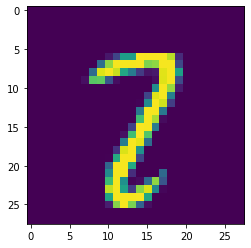

In [23]:
fail_idxs = [i for i in range(len(bins)) if bins[i] == 0]
max_n = 10

for n, idx in enumerate(fail_idxs):
    print('Actual number:', y_test_int[idx], '\nPredicted number:', classes[idx])
    plt.imshow(x_test[idx].reshape(28, 28))
    plt.show()
    if n > max_n:
        break

In [29]:
from sklearn.metrics import classification_report

classification_report(y_test_int[:500], classes)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95        42\n           1       0.94      1.00      0.97        67\n           2       0.98      0.89      0.93        55\n           3       0.98      0.93      0.95        45\n           4       0.96      0.91      0.93        55\n           5       1.00      1.00      1.00        50\n           6       0.98      0.95      0.96        43\n           7       0.91      0.98      0.94        49\n           8       0.95      0.95      0.95        40\n           9       0.96      0.94      0.95        54\n\n    accuracy                           0.96       500\n   macro avg       0.96      0.96      0.96       500\nweighted avg       0.96      0.96      0.96       500\n'